#### FINAL TESTS IN VISUALIZATION OF DATA
In this notebook, I tested the final versions of my methods and logistic in terms of visualization.

In [2]:
import pandas as pd
import functions as fun
import data_cleanup as dc
import data_exploration as de
import matplotlib.pyplot as plt
import Documentation as doc
import seaborn as sns
import numpy as np

import severity_score as ss

In [27]:
# RNA SEQUENCE AND SLICING

In [5]:
mutated_p53 = ss.generate_codon_variations(ss.p53_codons_gia)
aa = ss.translate_codons_df(mutated_p53)

In [6]:
# 1.1.) IMPORTING THE NATIVE DATASETS

In [30]:
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
gia_null_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv')
gia_wt_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv')
kot_hum: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Kotler_2018.csv')

In [8]:
# PART 1 ONLY SINGLE MUTATIONS

In [9]:
# 1.2.) INVERSE DF_TRAFO : NOTE : NO LONGER NEEDED, CHANGED FUNCTION SELECT_SMUT

In [10]:
gia_null_eto_dfi: pd.DataFrame = dc.df_transform(gia_null_eto).T
gia_null_nut_dfi: pd.DataFrame = dc.df_transform(gia_null_nut).T
gia_wt_nut_dfi: pd.DataFrame = dc.df_transform(gia_wt_nut).T
kot_hum_dfi: pd.DataFrame = dc.df_transform(kot_hum).T

In [11]:
# 1.3.) CREATE VARIATION_MATRIX AND CLEAN IT

In [12]:
variation_matrix_gia = ss.translate_codons_df(ss.generate_codon_variations(ss.p53_codons_gia))
cleaned_vm_gia = ss.clean_variation_matrix(variation_matrix_gia)
cleaned_vm_kot = cleaned_vm_gia.iloc[101:292].copy()

In [13]:
# 1.4.) Removing all Mutations that cannot be reached by a singular Mutation

In [14]:
gia_null_eto_dfi_cvm_aa: pd.DataFrame = ss.select_smut(gia_null_eto_dfi, cleaned_vm_gia)
gia_null_nut_cvm_aa: pd.DataFrame = ss.select_smut(gia_null_nut_dfi, cleaned_vm_gia)
gia_wt_nut_cvm_aa: pd.DataFrame = ss.select_smut(gia_wt_nut_dfi, cleaned_vm_gia)

In [15]:
# PART 2 ALL

In [16]:
# 2.1.) Z-TRANSFORMATION

In [1]:
gia_null_eto_z: pd.DataFrame = dc.z_transform(gia_null_eto)
gia_null_nut_z: pd.DataFrame = dc.z_transform(gia_null_nut)
gia_wt_nut_z: pd.DataFrame = dc.z_transform(gia_wt_nut)
kot_hum_z: pd.DataFrame = dc.z_transform(kot_hum)

NameError: name 'dc' is not defined

In [18]:
# 2.2.) MIN-MAX-SCALING

In [19]:
gia_null_eto_z_mmn: pd.DataFrame = dc.min_max_norm(gia_null_eto_z)
gia_null_nut_z_mmn: pd.DataFrame = dc.min_max_norm(gia_null_nut_z)
gia_wt_nut_z_mmn: pd.DataFrame = dc.min_max_norm(gia_wt_nut_z)
kot_hum_z_mmn: pd.DataFrame = dc.min_max_norm(kot_hum_z)

In [20]:
# 2.3.) DF_TRANSFORMATION

In [21]:
gia_null_eto_z_mmn_df: pd.DataFrame = dc.df_transform(gia_null_eto_z_mmn)
gia_null_nut_z_mmn_df: pd.DataFrame = dc.df_transform(gia_null_nut_z_mmn)
gia_wt_nut_z_mmn_df: pd.DataFrame = dc.df_transform(gia_wt_nut_z_mmn)
kot_hum_z_mmn_df: pd.DataFrame = dc.df_transform(kot_hum_z_mmn)

In [22]:
# 2.4.) MEAN AT EACH POSITION

In [23]:
gia_null_eto_z_mmn_df_mean: pd.DataFrame = fun.df_mean(gia_null_eto_z_mmn_df)
gia_null_nut_z_mmn_df_mean: pd.DataFrame = fun.df_mean(gia_null_nut_z_mmn_df)
gia_wt_nut_z_mmn_df_mean: pd.DataFrame = fun.df_mean(gia_wt_nut_z_mmn_df)
kot_hum_z_mmn_df_mean: pd.DataFrame = fun.df_mean(kot_hum_z_mmn_df)

In [24]:
# 2.5.) LINEGRAPH

In [25]:
kot_hum_z_mmn_df_mean.name = 'kot_hum_z_mmn_df_mean'
gia_null_nut_z_mmn_df_mean.name = 'gia_null_nut_z_mmn_df_mean'
gia_wt_nut_z_mmn_df_mean.name = 'gia_wt_nut_z_mmn_df_mean'
gia_null_eto_z_mmn_df_mean.name = 'gia_null_eto_z_mmn_df_mean'

In [26]:
def liniengraph(dataframes):
    plt.figure(figsize=(25, 5))
    for df in dataframes:
        x = df.columns.get_level_values('position_mut').astype(int)
        y = df.iloc[0].values.astype(float)
        label = df.name
        plt.plot(x, y, label=label, marker='o')
    plt.xlabel('position')
    plt.ylabel('DMS_score')
    plt.title('Mean DMS_scores of different datasets throughout each position of tp53')
    plt.xticks(np.arange(0, 393+1, 10))
    plt.legend()
    plt.show()

In [27]:
dataframes = [gia_wt_nut_z_mmn_df_mean, gia_null_eto_z_mmn_df_mean, gia_null_nut_z_mmn_df_mean, kot_hum_z_mmn_df_mean]

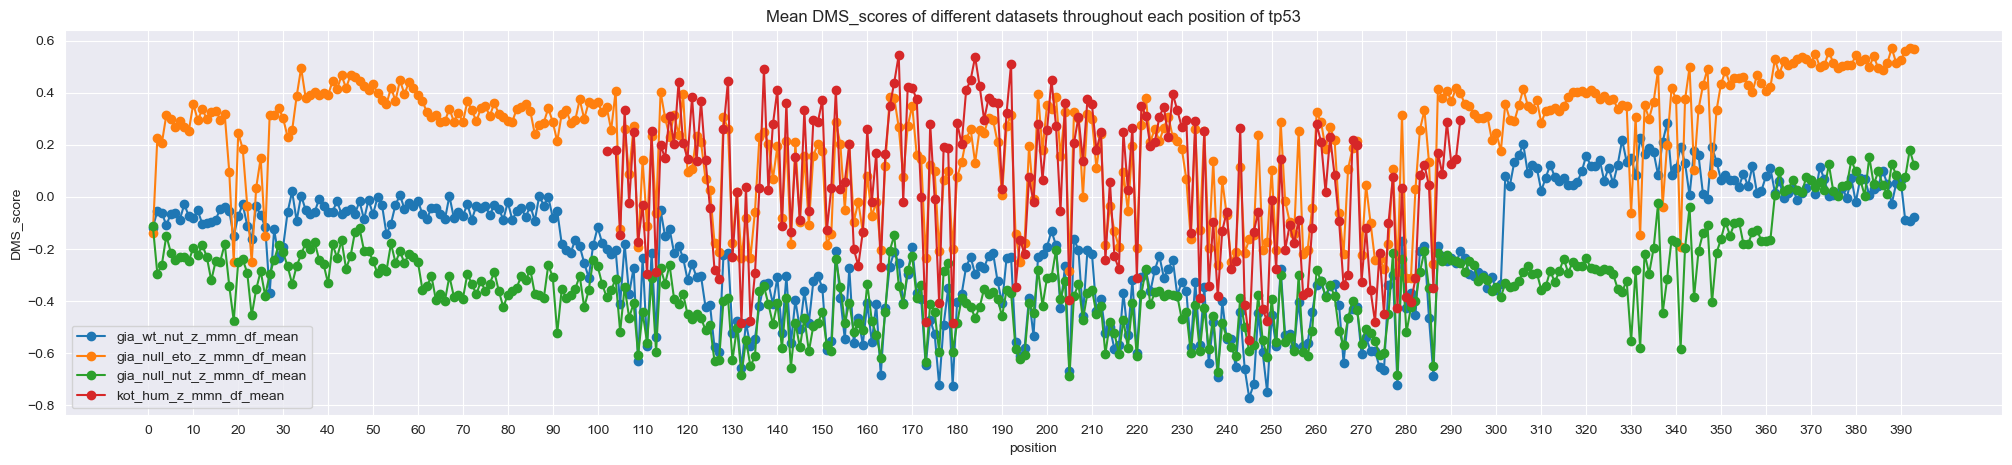

In [28]:
liniengraph(dataframes)

In [29]:
dataframes_gia_wt_nut = [gia_wt_nut_z_mmn_df_mean]

In [30]:
dataframes_gia_null_eto = [gia_null_eto_z_mmn_df_mean]

In [31]:
dataframes_gia_null_nut = [gia_null_nut_z_mmn_df_mean]

In [32]:
dataframes_kot_hum = [kot_hum_z_mmn_df_mean]

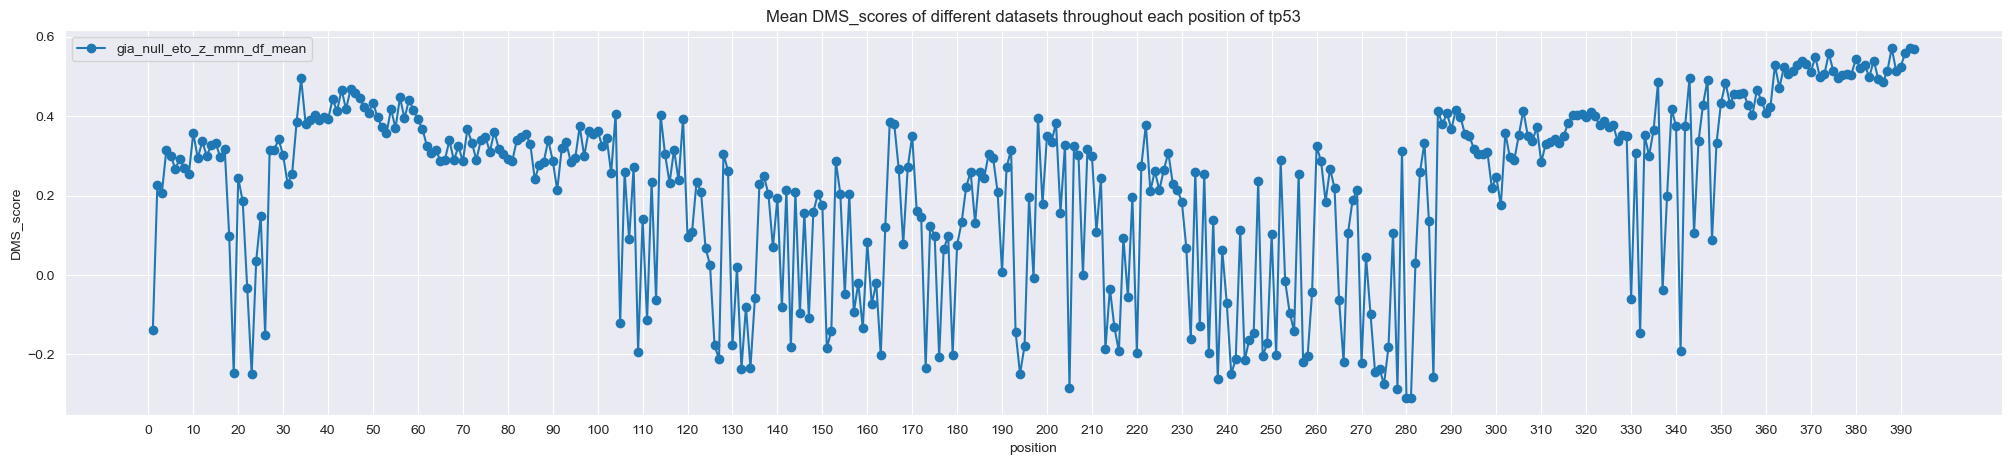

In [33]:
liniengraph(dataframes_gia_null_eto)

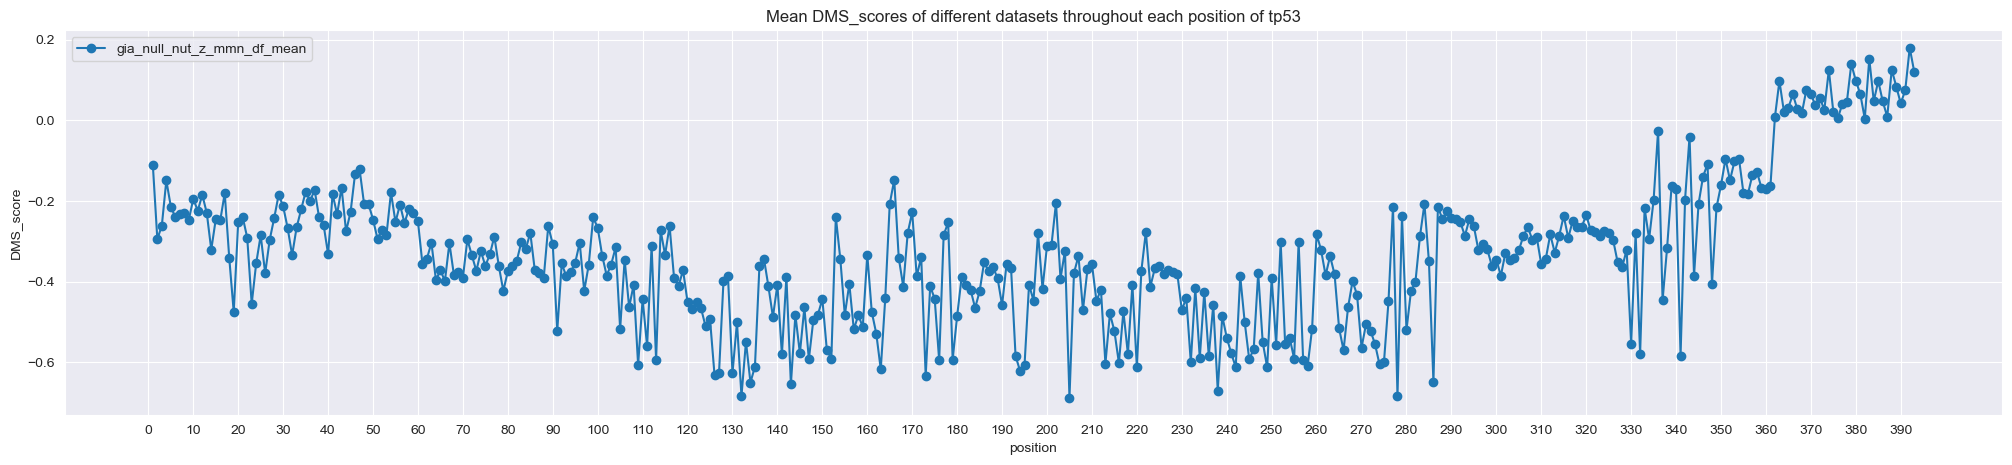

In [34]:
liniengraph(dataframes_gia_null_nut)

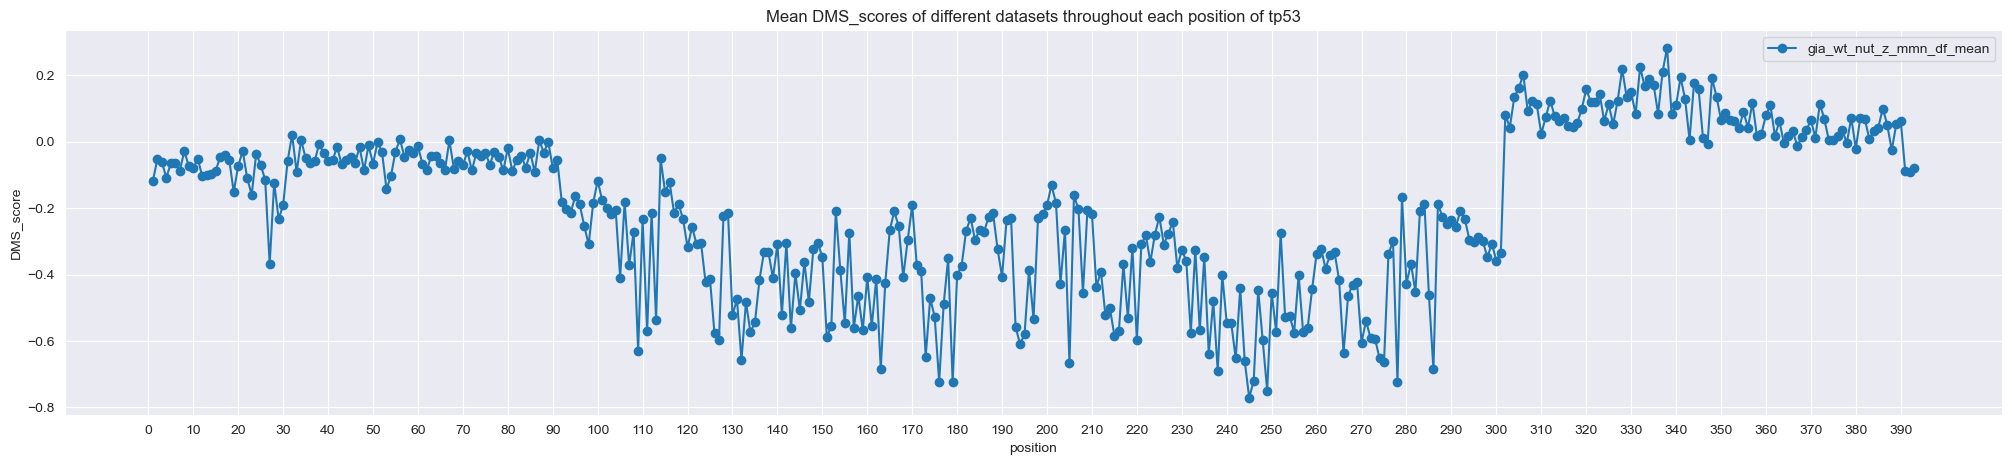

In [35]:
liniengraph(dataframes_gia_wt_nut)

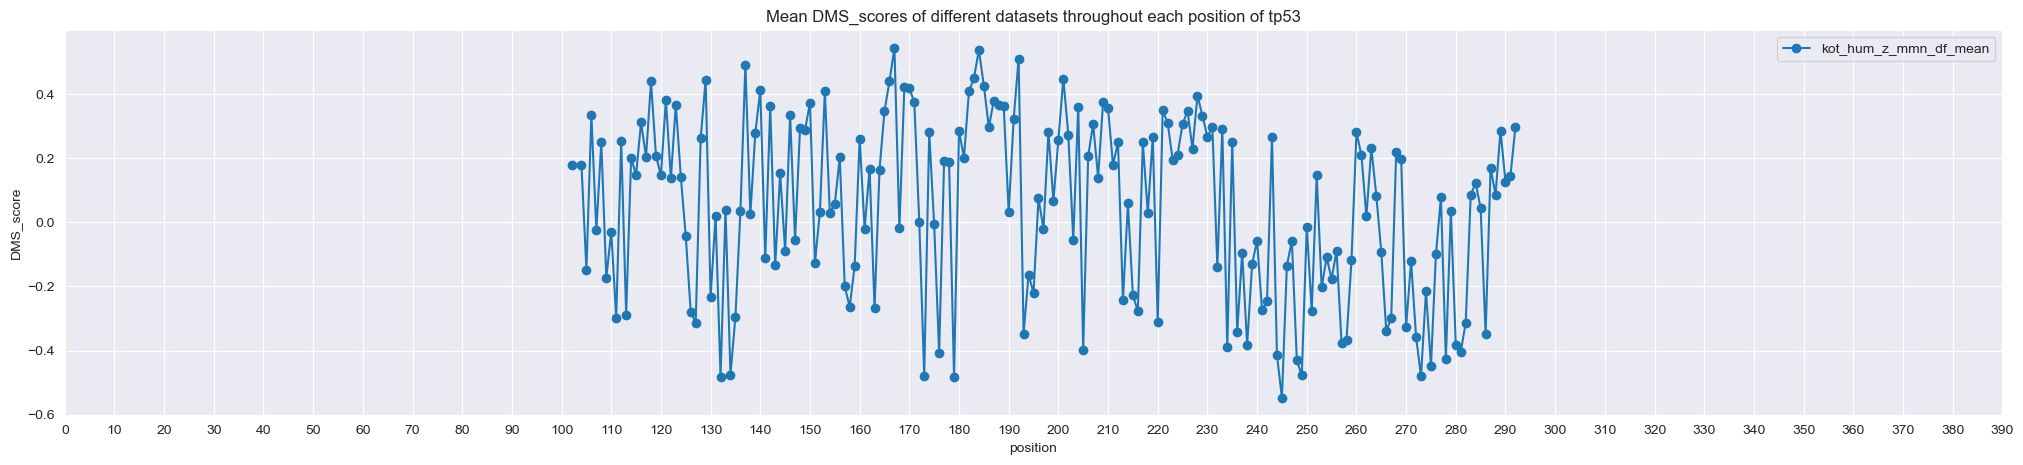

In [36]:
liniengraph(dataframes_kot_hum)

In [ ]:
# MULTIPLE HEATMAP TESTING

In [38]:
def hmap(frame1: pd.DataFrame, frame2: pd.DataFrame, frame3: pd.DataFrame) -> None:
    fig, axes = plt.subplots(3, 1, figsize=(40, 25), sharex=True)
    sns.set(font_scale=2)

    frames = [frame1, frame2, frame3]

    for i, ax in enumerate(axes):
        hmap_frame: pd.DataFrame = frames[i].pivot(index='AS_new', columns=['position_mut', 'AS_old'], values='DMS_score')

        sns.heatmap(hmap_frame, cmap='seismic', ax=ax)
        ax.set_title(f'DMS Scores for Mutations - Subgroup {i+1}')

    plt.tight_layout()
    plt.show()


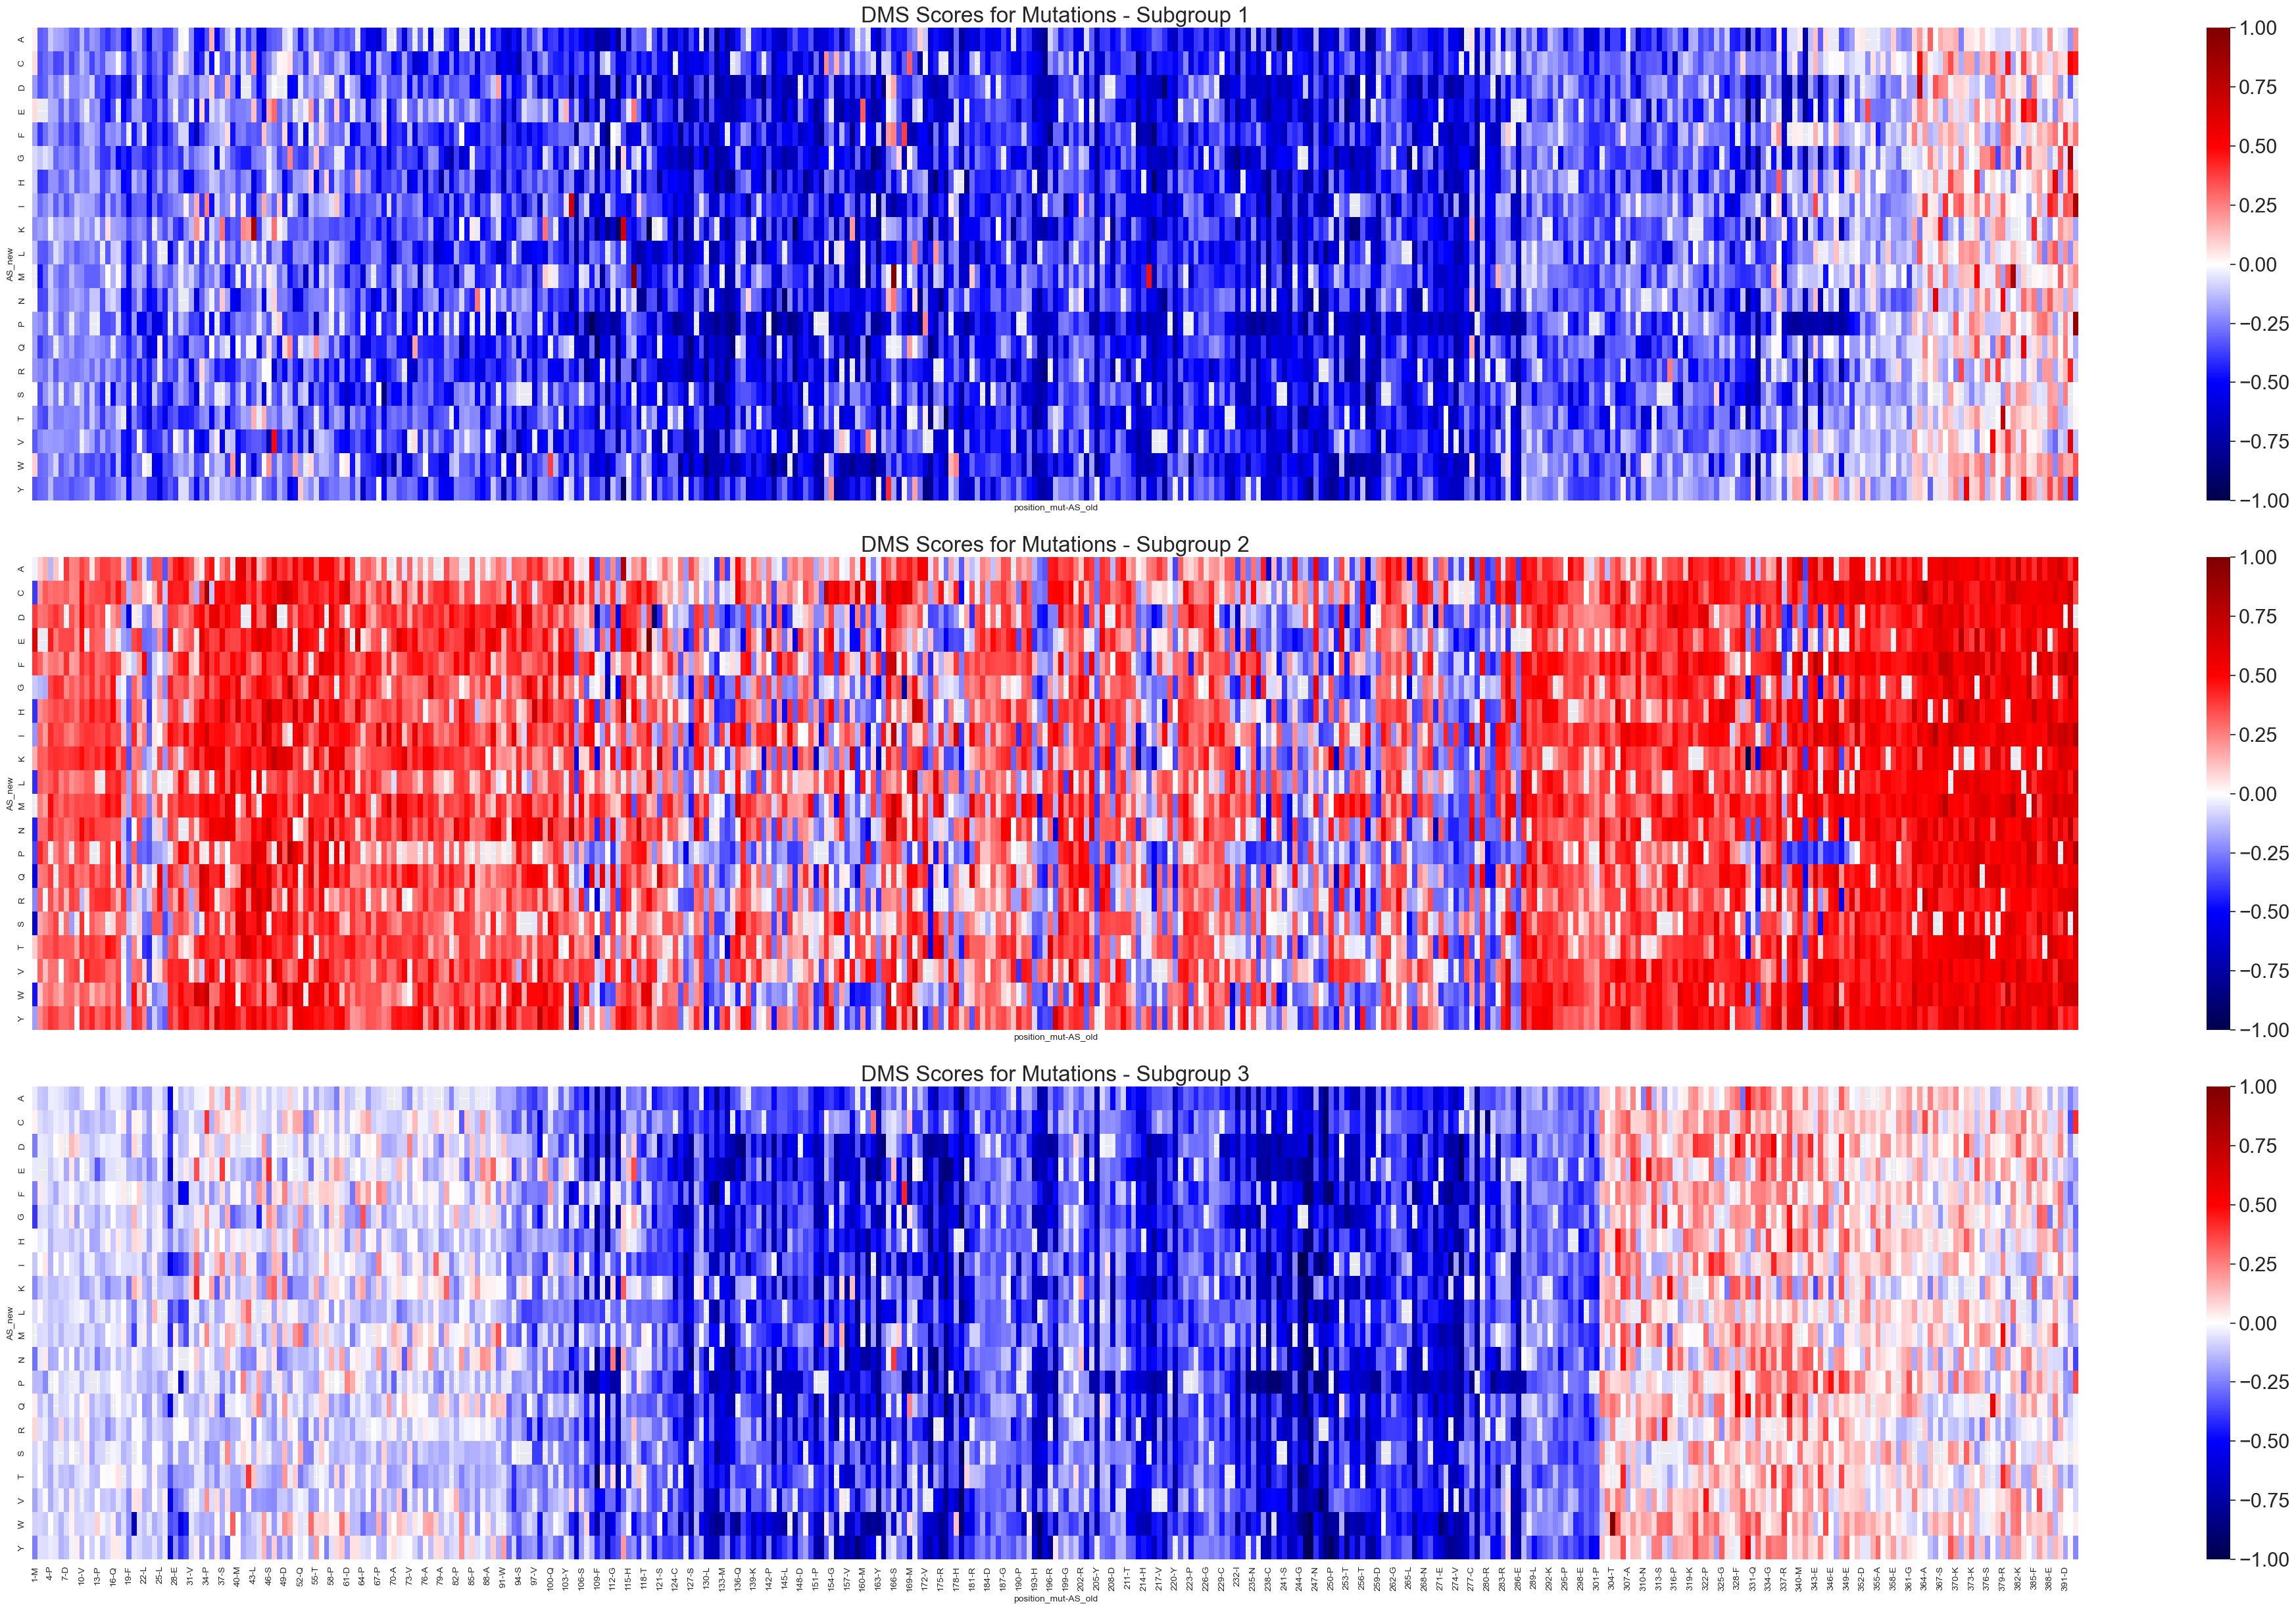

In [39]:
hmap(gia_null_nut, gia_null_eto, gia_wt_nut)

In [ ]:
def mult_hmap(frame1: pd.DataFrame, frame2: pd.DataFrame, frame3: pd.DataFrame) -> None:
    fig, axes = plt.subplots(3, 1, figsize=(50, 32), sharex=True)
    sns.set(font_scale=2)

    frames = [frame1, frame2, frame3]
    for frame in frames:
        frame = dc.aufteilung_mut_pos(frame)

    for i, ax in enumerate(axes):
        hmap_frame: pd.DataFrame = frames[i].pivot(index='AS_new', columns=['position_mut', 'AS_old'], values='DMS_score')

        sns.heatmap(hmap_frame, cmap='seismic', ax=ax)
        ax.set_title('')  # Remove heatmap title

        if i < 2:
            ax.set(xlabel='')  # Remove x-axis label for upper three heatmaps

    plt.tight_layout()
    plt.show()


In [ ]:
mult_hmap(gia_null_nut, gia_null_eto, gia_wt_nut)


In [ ]:
gia_null_nut
# mult_hmap(gia_null_nut, gia_null_eto, gia_wt_nut)

In [ ]:
def mult_hmap(Daten1: pd.DataFrame, Daten2: pd.DataFrame, Daten3: pd.DataFrame) -> None:
    fig, axes = plt.subplots(3, 1, figsize=(40, 29), sharex=True)
    sns.set(font_scale=2)
    frames = [Daten1, Daten2, Daten3]
    for frame in frames:
        frame = dc.aufteilung_mut_pos(frame)
    names = ["Gia_null_eto", "Gia_wt_nut", "Gia_null_nut"]
    for i, ax in enumerate(axes):
        hmap_frame: pd.DataFrame = frames[i].pivot(index='AS_new', columns=['position_mut', 'AS_old'], values='DMS_score')
        sns.heatmap(hmap_frame, cmap='seismic', ax=ax)
        ax.set_title('')
        if i < 2:
            ax.set(xlabel='')
        ax.text(0.05, 0.95, names[i], transform=ax.transAxes, fontsize=24,
                verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()


In [2]:
mult_hmap(gia_null_eto, gia_wt_nut, gia_null_nut)

NameError: name 'mult_hmap' is not defined

In [ ]:
lowest_vals = pd.DataFrame(columns=['Name of the Dataset', 'Location of lowest DMS_score sum', "Sum", "Original AA"])

lowest_vals['Name of the Dataset'] = ["Giacomelli Null Etoposide", "Giacomelli NULL Nutlin", "Giacomelli WT Nutlin", "Kotler"]
lowest_vals['Location of lowest DMS_score sum'] = [280, 205, 245, 245]
lowest_vals['Sum'] = [-33.450339, -27.798457, -41.124490, -4.352254]
lowest_vals['Original AA'] = ['R', 'Y', 'G', "G"]

lowest_vals_gesammelt = pd.DataFrame(columns=['Giacomelli NULL Etoposide location','Giacomelli NULL Etoposide sums', 'Giacomelli NULL Nutlin location', 'Giacomelli NULL Nutlin sums', "Giacomelli WT Nutlin location", "Giacomelli WT Nutlin sums",  "Kotler location", "Kotler sums"])

anzahl: int = 10
lowest_vals_gesammelt = pd.DataFrame()
#####


In [4]:

GNELV= dc.low_val(doc.gia_null_eto_norm, 5)
GNNLV= dc.low_val(doc.gia_null_nut_norm, 5)
GWNLV= dc.low_val(doc.gia_wt_nut_norm, 5)
KHLV= dc.low_val(doc.kot_hum_norm, 5)


In [5]:
GNELV

,,Sum
position_mut,AS_old,
280,R,-6.190289
281,D,-6.189019
278,P,-5.751278
205,Y,-5.682232
275,C,-5.511703


In [6]:
GNNLV

,,Sum
position_mut,AS_old,
205,Y,-13.762829
278,P,-13.679713
132,K,-13.674308
238,C,-13.403968
143,V,-13.094452


In [7]:
GWNLV

,,Sum
position_mut,AS_old,
245,G,-15.419176
249,R,-14.978965
179,H,-14.478058
278,P,-14.463685
176,C,-14.455811


In [8]:
KHLV

,,Sum
position_mut,AS_old,
245,G,-6.568038
273,R,-4.799821
249,R,-4.299519
281,D,-4.030244
132,K,-3.858204


In [17]:
ADRB2_hum: pd.DataFrame = pd.read_csv('../DMS_data/ADRB2_HUMAN_Jones_2020.csv')
ADRB2_hum_amp: pd.DataFrame = dc.aufteilung_mut_pos(ADRB2_hum)
ADRB2_hum_norm: pd.DataFrame = dc.norm(ADRB2_hum)
ADRB2_hum_norm_df: pd.DataFrame = dc.df_transform(ADRB2_hum_norm)
ADRB2_hum_norm_df_mean: pd.DataFrame = fun.df_mean(ADRB2_hum_norm_df)
dataframe_ADRB = [ADRB2_hum_norm_df_mean]
ADRB2_hum_norm_df_mean.name = 'ADRB2_HUMAN_Jones_2020'

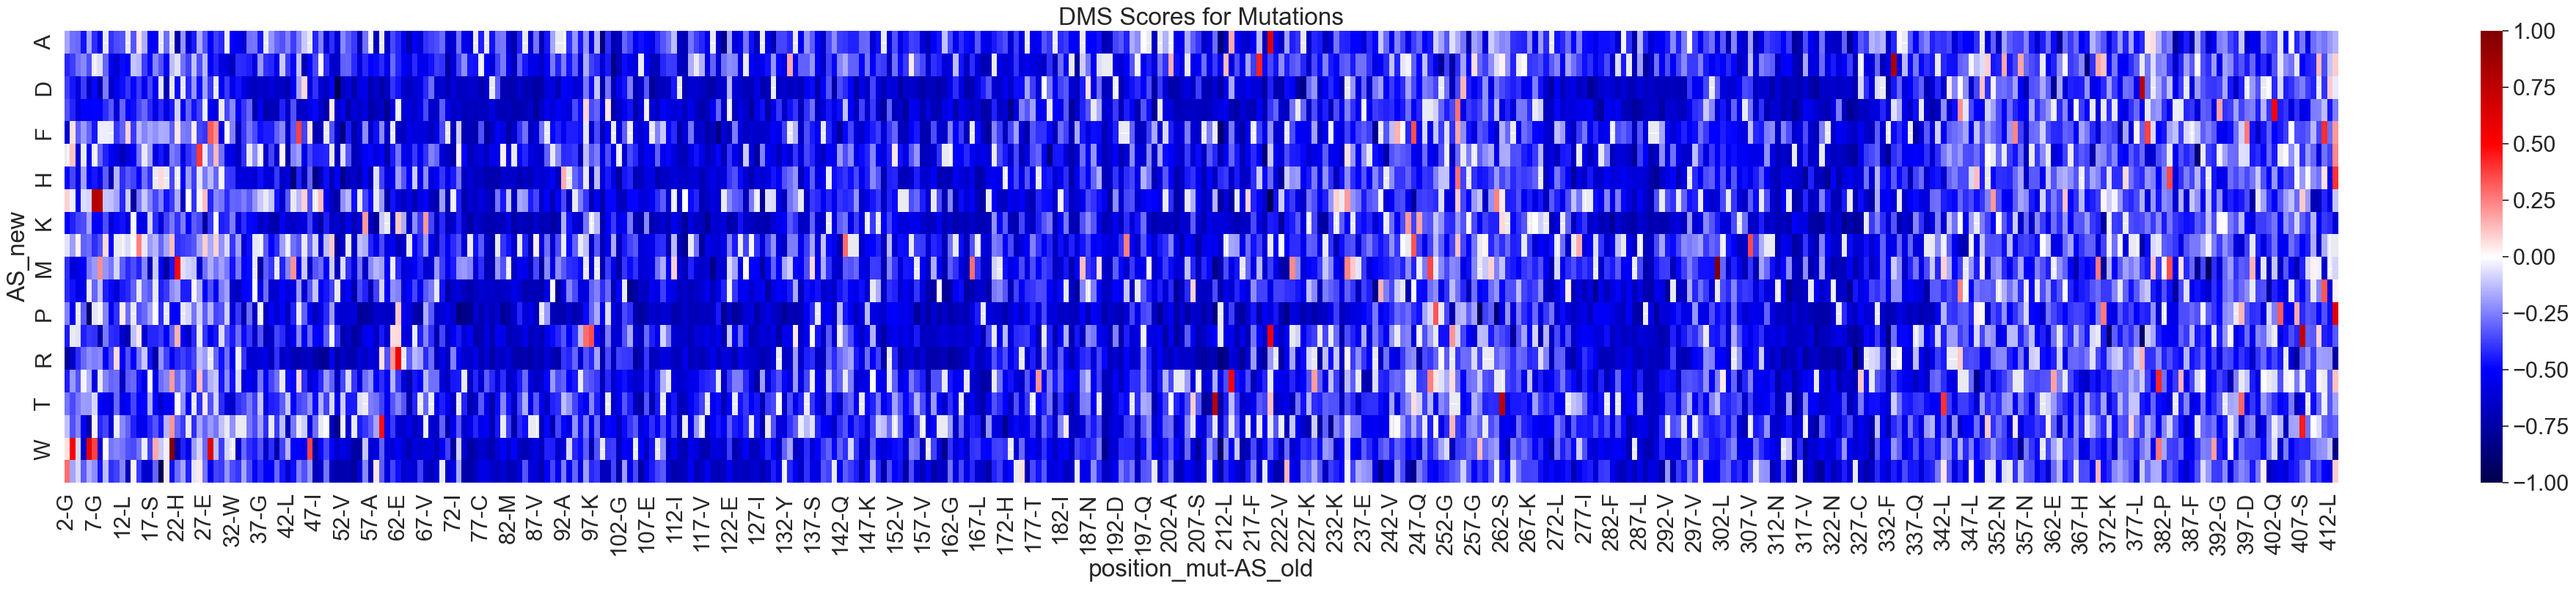

In [18]:
fun.hmap(ADRB2_hum_amp)

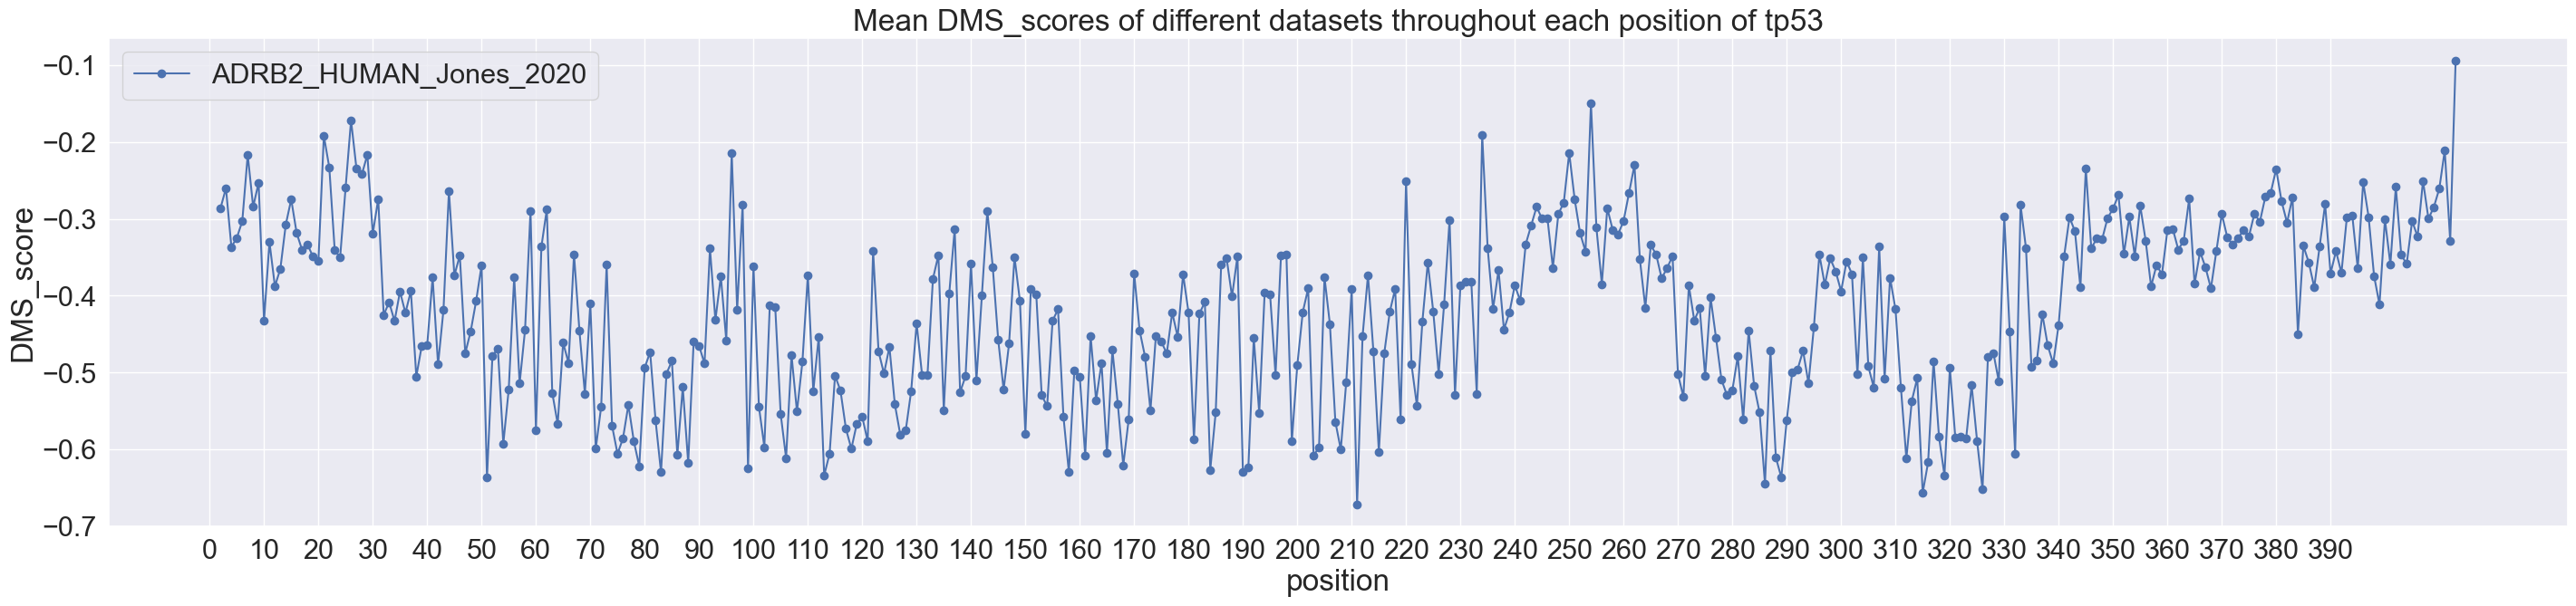

In [19]:
doc.liniengraph(dataframe_ADRB)

In [20]:
BLAT: pd.DataFrame = pd.read_csv('../DMS_data/BLAT_ECOLX_Stiffler_2015.csv')
BLAT_amp: pd.DataFrame = dc.aufteilung_mut_pos(BLAT)
BLAT_norm: pd.DataFrame = dc.norm(BLAT)
BLAT_norm_df: pd.DataFrame = dc.df_transform(BLAT_norm)
BLAT_norm_df_mean: pd.DataFrame = fun.df_mean(BLAT_norm_df)
dataframe_BLAT = [BLAT_norm_df_mean]
BLAT_norm_df_mean.name = 'BLAT_ECOLX_Stiffler_2015.csv'

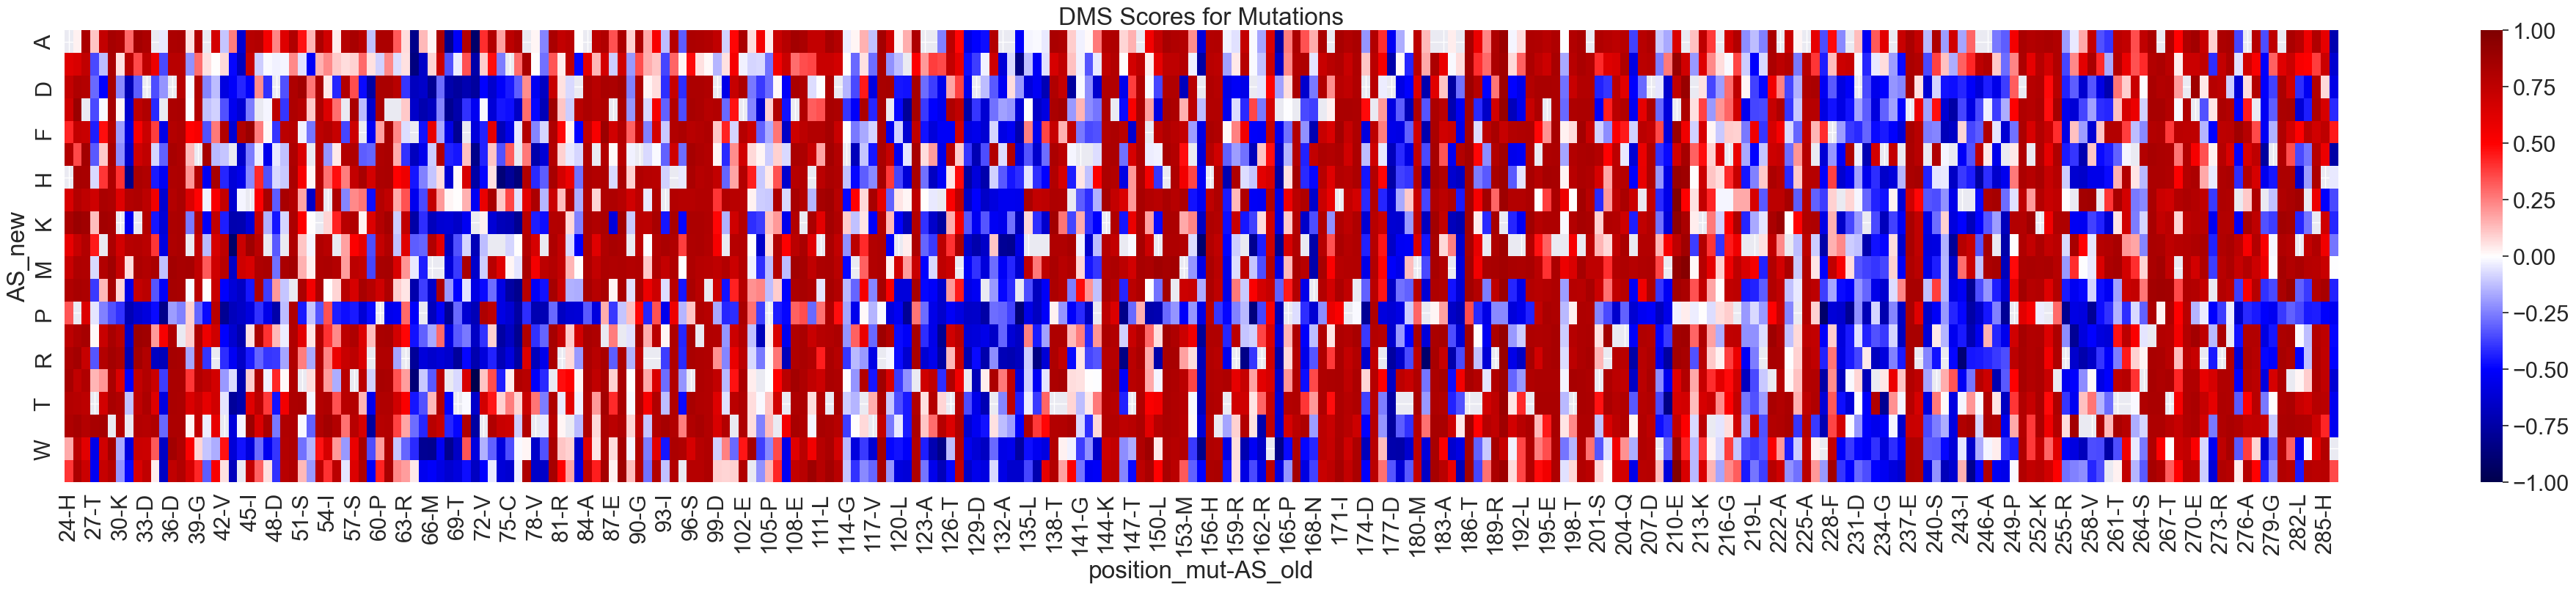

In [22]:
fun.hmap(BLAT_amp)

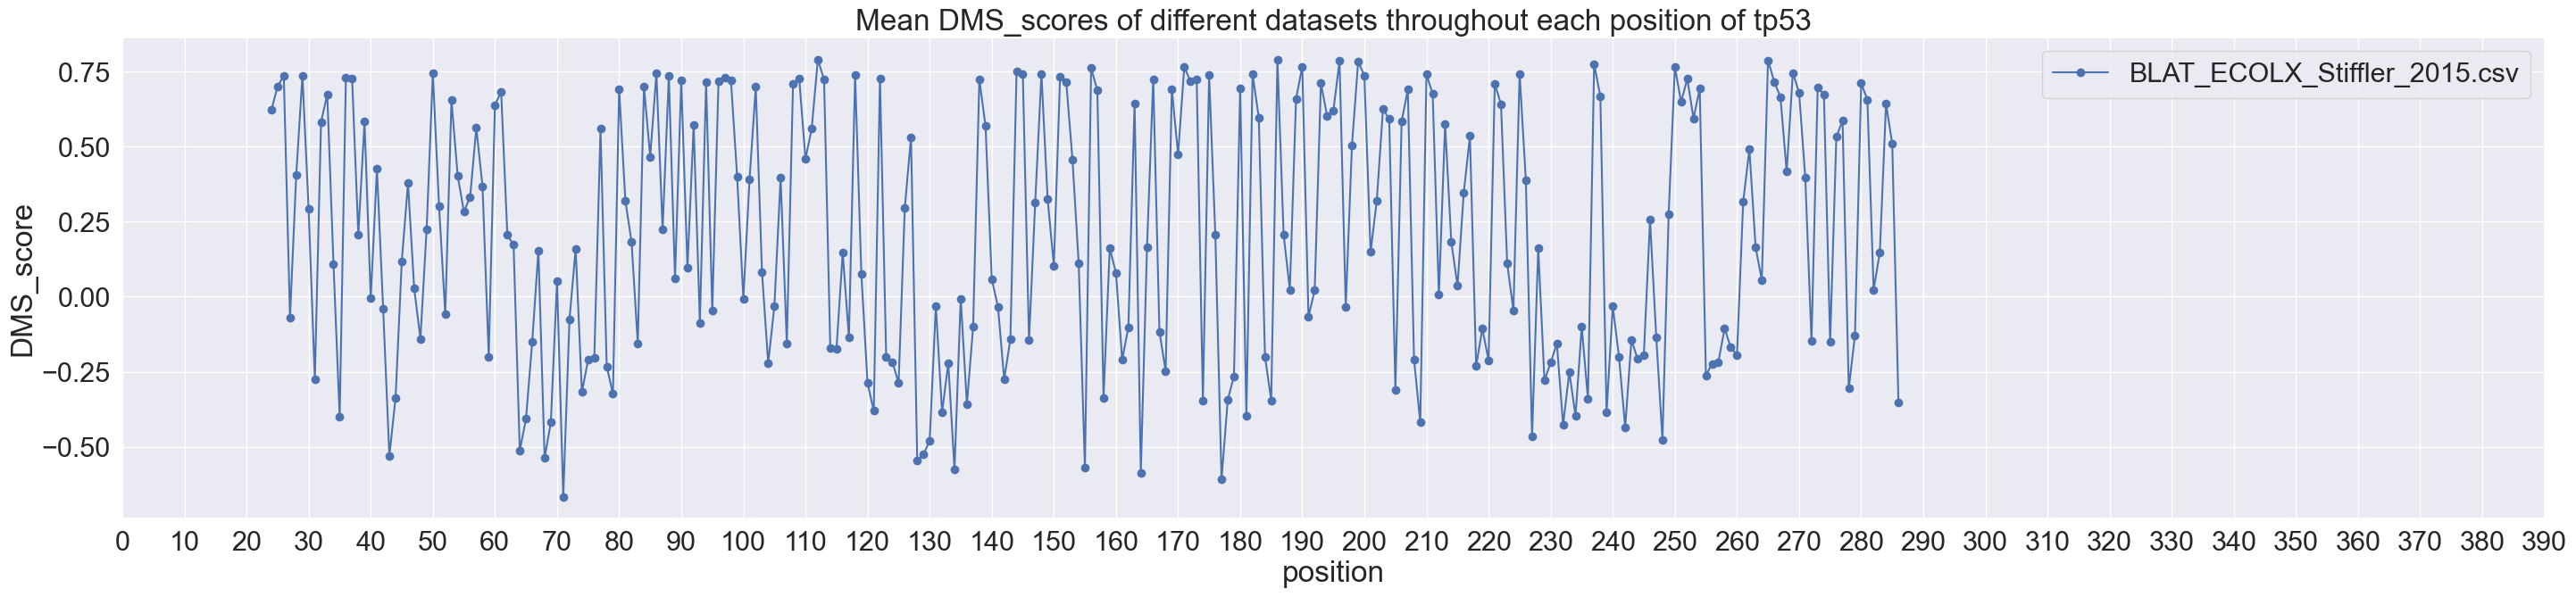

In [23]:
doc.liniengraph(dataframe_BLAT)

In [ ]:
#20-43 80-120 138-230 233-238 246-253 253-290

In [28]:
def mult_hmap(Daten1: pd.DataFrame, Daten2: pd.DataFrame, Daten3: pd.DataFrame) -> None:
    fig, axes = plt.subplots(3, 1, figsize=(30, 20), sharex=True)
    sns.set(font_scale=2)
    frames = [Daten1, Daten2, Daten3]
    for frame in frames:
        frame = dc.aufteilung_mut_pos(frame)
    names = ["Gia_null_eto", "Gia_wt_nut", "Gia_null_nut"]
    for i, ax in enumerate(axes):
        hmap_frame: pd.DataFrame = frames[i].pivot(index='AS_new', columns=['position_mut', 'AS_old'], values='DMS_score')
        sns.heatmap(hmap_frame, cmap='seismic', ax=ax)
        ax.set_title('')
        if i < 2:
            ax.set(xlabel='')
        ax.text(0.05, 0.95, names[i], transform=ax.transAxes, fontsize=24,
                verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()

In [31]:
gia_null_eto_norm : pd.DataFrame = dc.norm(gia_null_eto)
gia_null_nut_norm : pd.DataFrame = dc.norm(gia_null_nut)
gia_wt_nut_norm : pd.DataFrame = dc.norm(gia_wt_nut)
kot_hum_norm : pd.DataFrame = dc.norm(kot_hum)

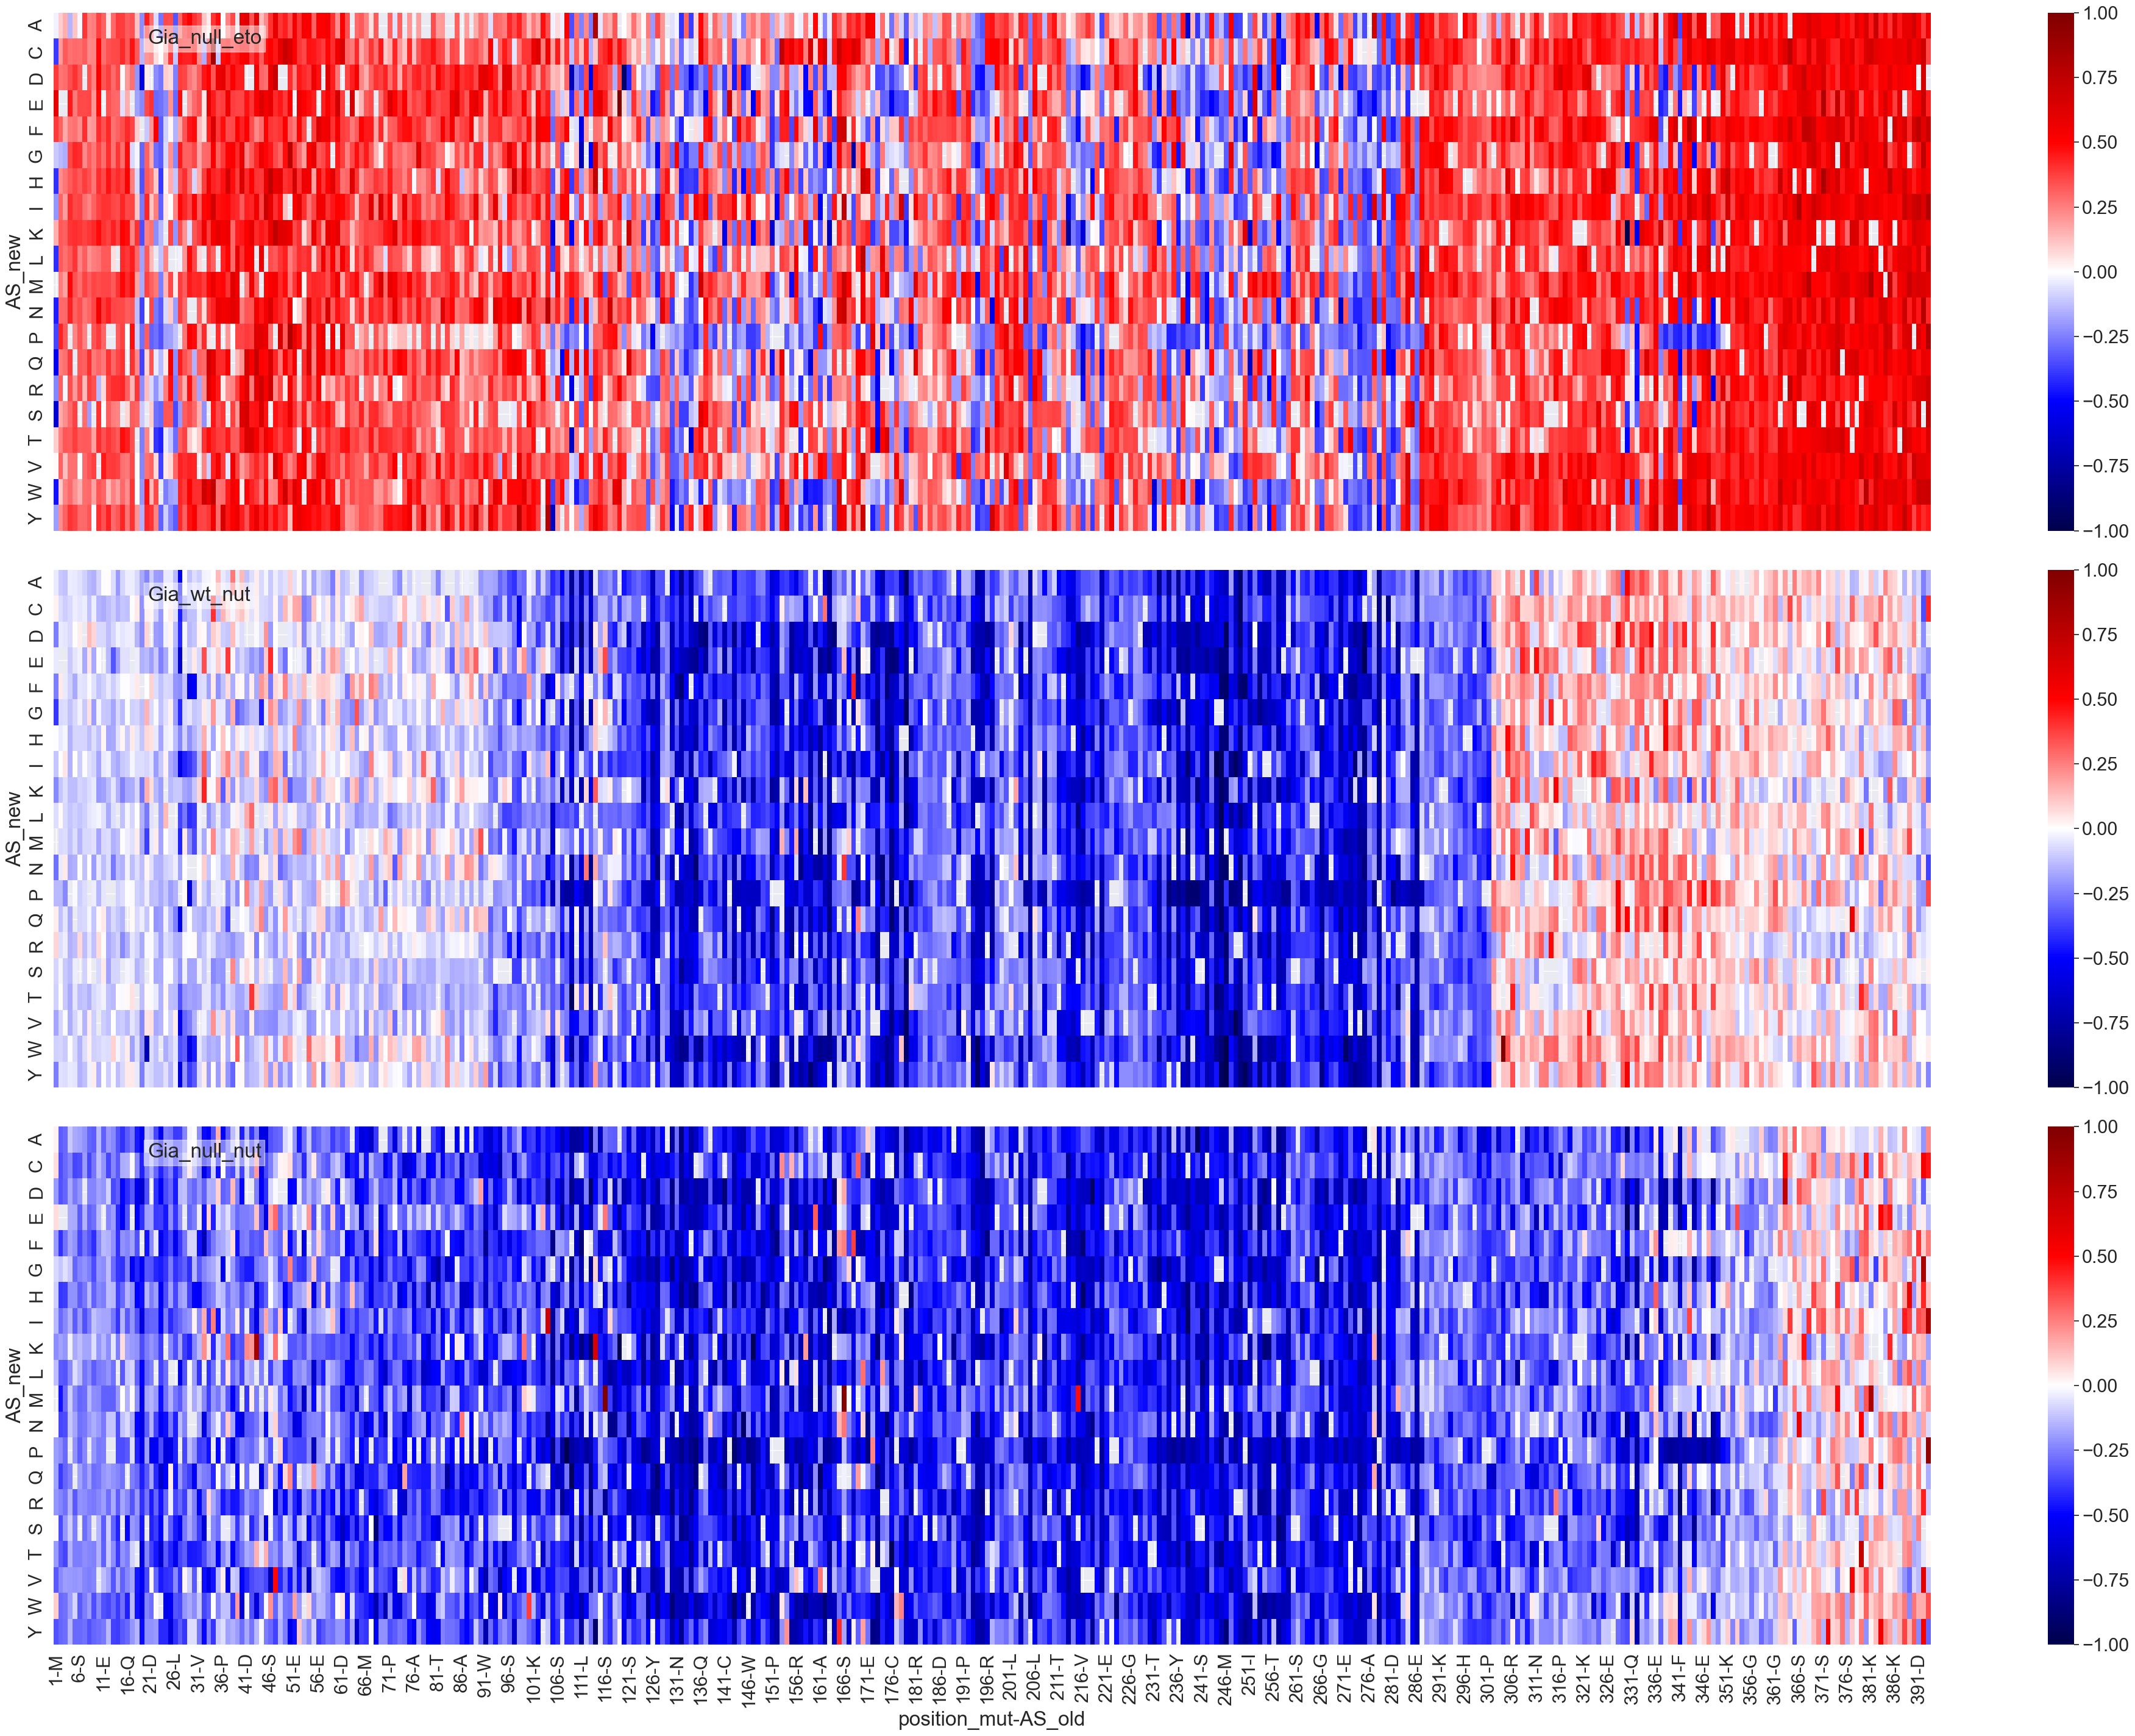

In [32]:
fun.mult_hmap(gia_null_eto_norm, gia_wt_nut_norm, gia_null_nut_norm)


In [5]:
BRCA: pd.DataFrame = pd.read_csv('../DMS_data/BRCA1_HUMAN_Findlay_2018.csv')
BRCA_amp: pd.DataFrame = dc.aufteilung_mut_pos(BRCA)
BRCA_norm: pd.DataFrame = dc.norm(BRCA)
BRCA_norm_df: pd.DataFrame = dc.df_transform(BRCA_norm)
BRCA_norm_df_mean: pd.DataFrame = fun.df_mean(BRCA_norm_df)
dataframe_BRCA = [BRCA_norm_df_mean]
BRCA_norm_df_mean.name = 'BRCA1_HUMAN_Findlay_2018.csv'

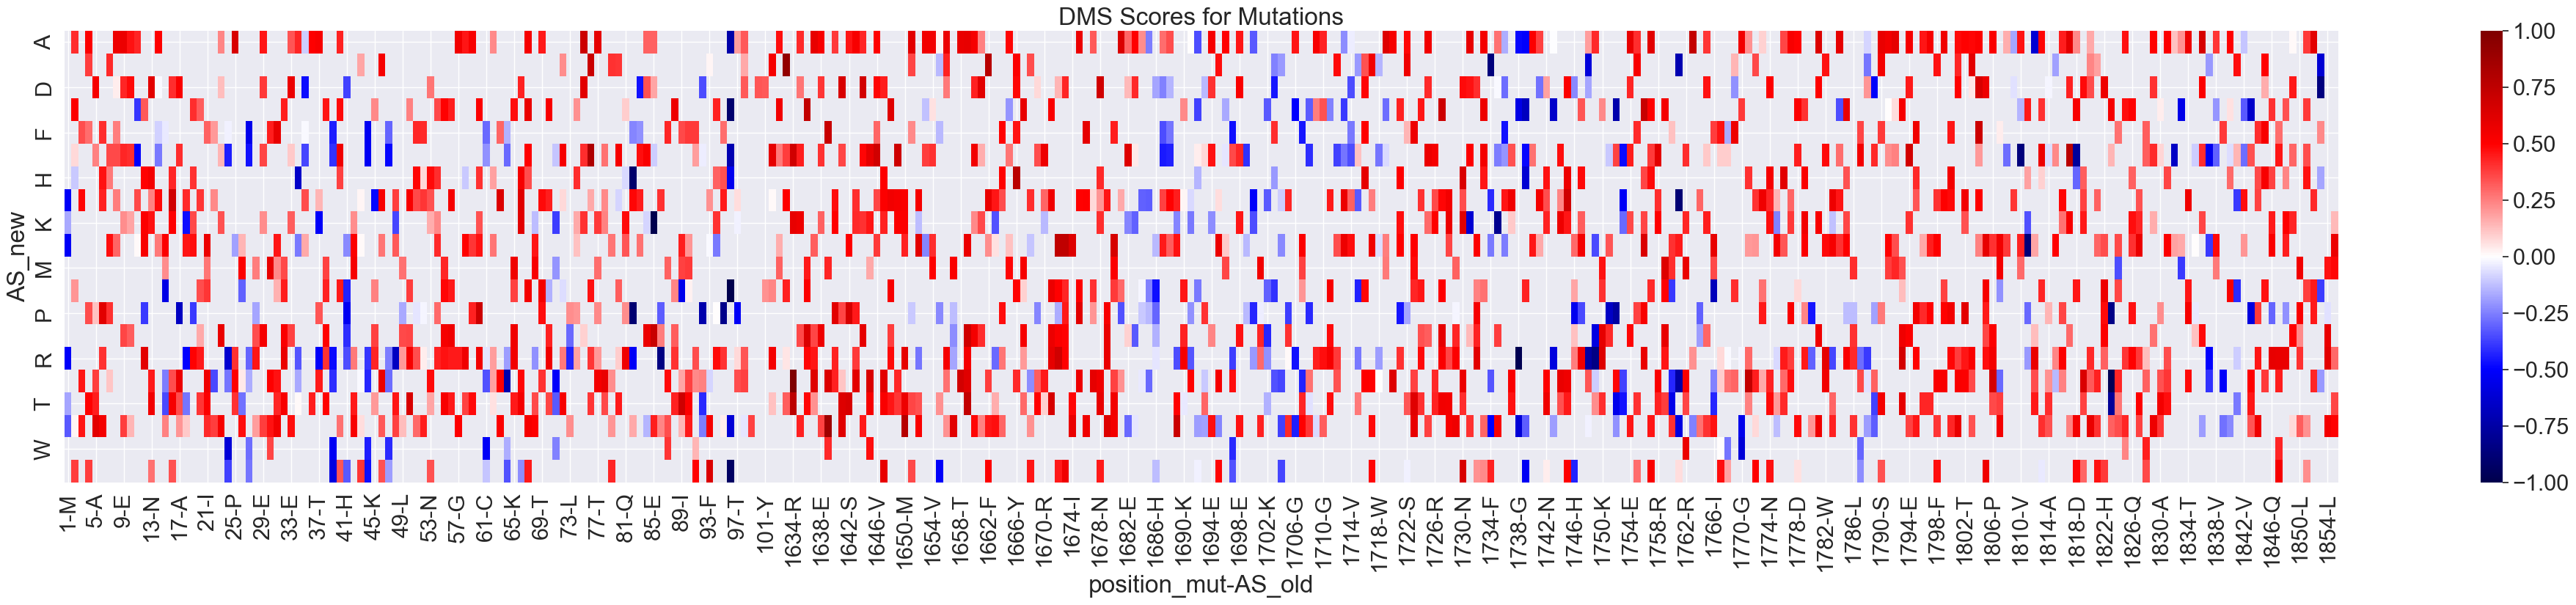

In [6]:
fun.hmap(BRCA_amp)

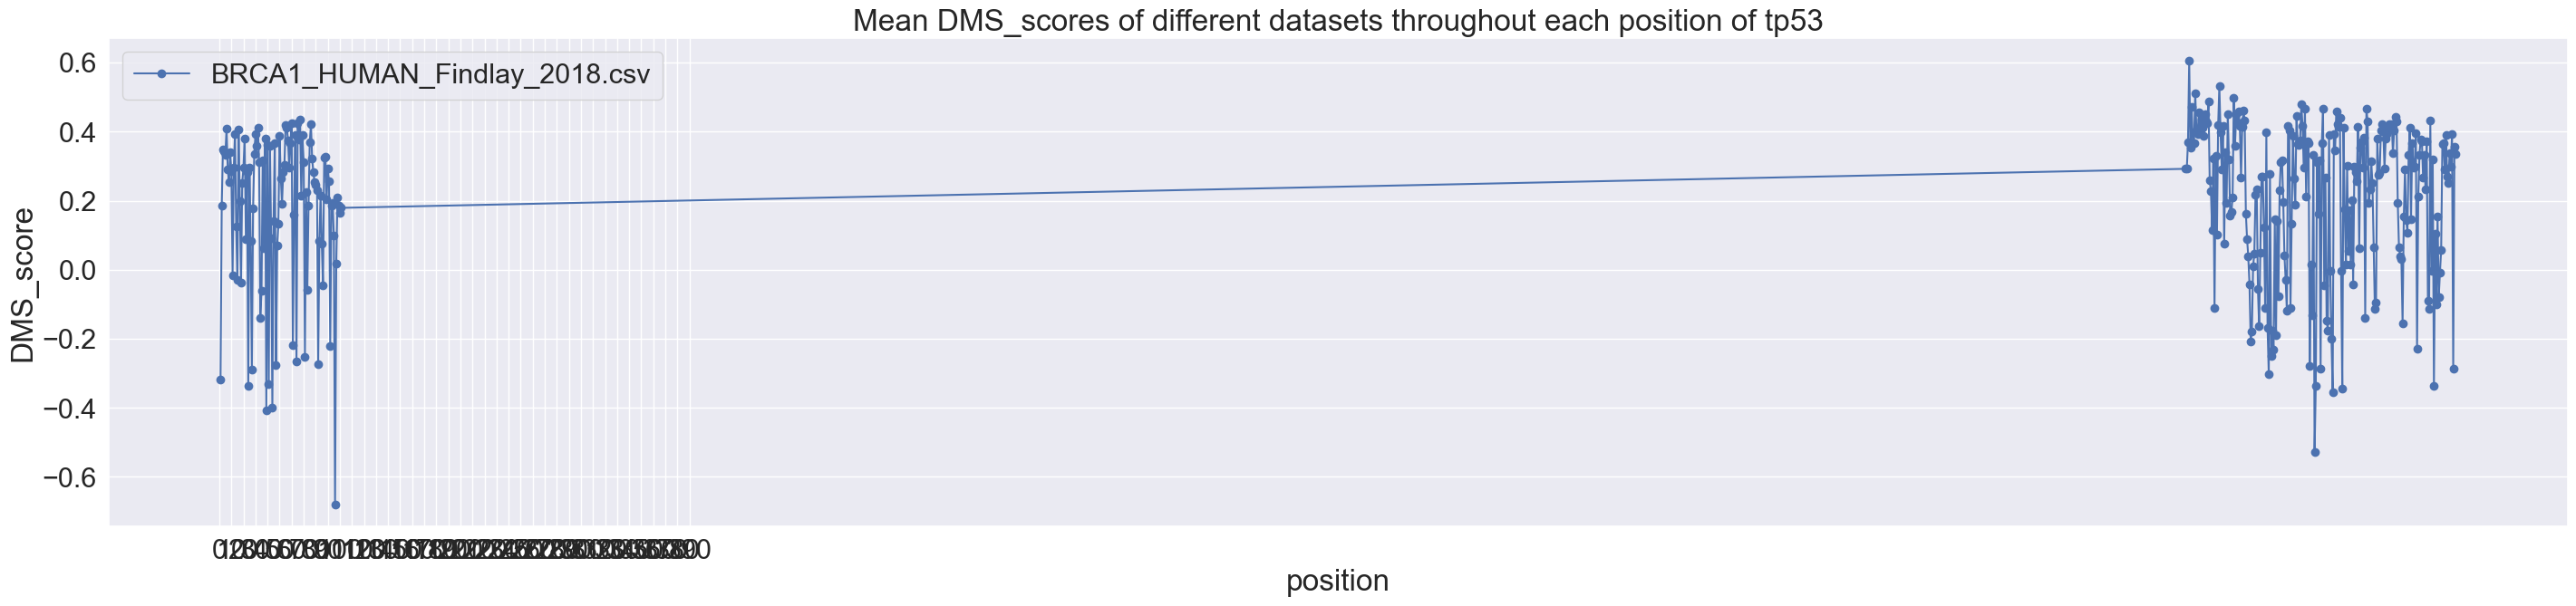

In [7]:
doc.liniengraph(dataframe_BRCA)